In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("./Dataset/Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [3]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [4]:
df['Leading_Current_Power_Factor'].unique()

array([100.  ,  99.87,  24.11, ...,  26.21,  57.73,  31.65])

In [5]:
df['Day_of_week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [6]:
df['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [7]:
df['Leading_Current_Reactive_Power_kVarh'].unique()

array([ 0.  ,  0.18, 15.66, 16.96, 21.28, 19.22, 16.88, 22.32, 18.  ,
       16.92, 23.4 ,  5.65,  4.82,  6.7 ,  4.57, 12.89, 23.15, 16.67,
       16.63, 23.33, 16.74, 16.99, 18.25, 22.1 , 16.7 , 19.33, 21.35,
       16.81, 20.45, 20.77, 21.64, 19.19, 23.51, 17.39, 17.35,  8.96,
        5.47, 16.24, 22.57, 20.74, 20.88, 22.54, 19.55, 17.42, 24.26,
       17.75, 25.2 , 17.5 , 10.08,  0.07,  0.11,  0.94,  1.15,  0.54,
        0.14, 18.9 , 25.92, 25.34, 25.49,  6.52,  1.04,  0.5 ,  1.58,
        0.43,  1.37,  0.47,  3.96, 12.13, 23.22, 25.16, 26.5 , 26.42,
       26.46, 15.44,  0.04, 26.21, 25.56, 25.74,  6.08,  1.69,  1.94,
        0.79,  1.66,  1.22,  6.98, 23.83, 24.8 , 26.82, 26.78, 15.16,
       18.79, 26.39, 26.89,  1.19,  3.46,  2.12,  2.77, 24.08, 25.78,
       25.85, 14.65, 20.2 , 26.32, 25.81,  7.6 ,  3.56,  0.61,  4.43,
       17.64, 24.05, 26.68, 26.64, 26.6 , 15.19, 20.7 , 20.99, 19.73,
       17.93,  9.9 ,  7.06,  7.63,  7.42, 14.08, 24.91, 19.69, 18.14,
       20.92, 21.67,

In [8]:
df['CO2(tCO2)'].unique()

array([0.  , 0.02, 0.03, 0.05, 0.06, 0.04, 0.01, 0.07])

In [9]:
df['CO2(tCO2)'] = df['CO2(tCO2)'] * 100
df['CO2(tCO2)'].unique()

array([0., 2., 3., 5., 6., 4., 1., 7.])

In [10]:
df['CO2(tCO2)'].unique()

array([0., 2., 3., 5., 6., 4., 1., 7.])

In [11]:
day_to_number = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['Day_of_week'] = df['Day_of_week'].map(day_to_number)

df['Day_of_week'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [12]:
df['WeekStatus'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [13]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,0,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,0,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,0,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,0,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,0,Light_Load


In [14]:
df['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [15]:
status_to_number = {
    'Light_Load': 0,
    'Medium_Load': 1,
    'Maximum_Load': 2
}

df['Load_Type'] = df['Load_Type'].map(status_to_number)

In [16]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,0,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,0,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,0,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,0,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,0,0


In [17]:
df['Load_Type'].unique()

array([0, 1, 2])

In [18]:
weekstatus_to_number = {
    'Weekday': 1,
    'Weekend': 0
}


df['WeekStatus'] = df['WeekStatus'].map(weekstatus_to_number)

In [19]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,0,0


In [20]:
df['date'].unique()

array(['01/01/2018 00:15', '01/01/2018 00:30', '01/01/2018 00:45', ...,
       '31/12/2018 23:30', '31/12/2018 23:45', '31/12/2018 00:00'],
      dtype=object)

In [21]:
df.head(4)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0


In [22]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,0,0


In [23]:
total = 0
averages = []
numbers = df['Usage_kWh'].values

for i in range(0, 35040, 4):
    group = numbers[i:i+4]
    
    average = sum(group) / len(group)
    
    averages.append(average)


print(numbers)
print(averages[:10])
len(averages)

[3.17 4.   3.24 ... 3.78 3.78 3.67]
[3.43, 3.5749999999999997, 3.44, 3.6175, 3.4725, 3.545, 3.4475000000000002, 3.41, 3.6100000000000003, 3.7975000000000003]


8760

In [24]:
df.drop(['hourlyـaverage'], axis='columns')

KeyError: "['hourlyـaverage'] not found in axis"

In [26]:
df['hourly_average'] = 0

In [27]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hourly_average
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,0,0,0


In [28]:
df['hourly_average'].iloc[3] = averages[0]

/tmp/ipykernel_18794/627285199.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['hourly_average'].iloc[3] = averages[0]
/tmp/ipykernel_18794/627285199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [29]:
iloc_num = -1

for i in range(8760):
    iloc_num = iloc_num + 4
    df['hourly_average'].iloc[iloc_num] = averages[i]


df.head(20)

/tmp/ipykernel_18794/261661467.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['hourly_average'].iloc[iloc_num] = averages[i]


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hourly_average
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0,0.0000
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0,0.0000
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0,0.0000
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0,3.4300
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,0,0,0.0000
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,1,0,0,0.0000
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,1,0,0,0.0000
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,1,0,0,3.5750
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,1,0,0,0.0000
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,1,0,0,0.0000


In [30]:
df.drop(['hourlyـaverage'], axis='columns')

KeyError: "['hourlyـaverage'] not found in axis"

In [31]:
df['daily_average'] = 0

In [32]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hourly_average,daily_average
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0,0.00,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0,0.00,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0,0.00,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0,3.43,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,0,0,0.00,0


In [33]:
total = 0
daily_averages = []
numbers = df['Usage_kWh'].values

for i in range(0, 35040, 96):
    group = numbers[i:i+96]
    
    average = sum(group) / len(group)
    
    daily_averages.append(average)

print(numbers)
print(daily_averages[:10])
len(daily_averages)

[3.17 4.   3.24 ... 3.78 3.78 3.67]
[3.6652083333333323, 41.150312500000005, 37.09427083333334, 51.85125, 48.78541666666667, 3.885, 3.6345833333333335, 55.40114583333334, 57.17052083333335, 46.30406249999998]


365

In [34]:
df['Usage_kWh'].values

array([3.17, 4.  , 3.24, ..., 3.78, 3.78, 3.67])

In [35]:
iloc_num = -1

for i in range(365):
    iloc_num = iloc_num + 96
    print(iloc_num)
    df['daily_average'].iloc[iloc_num] = daily_averages[i]


df.head(100)

95
191
287
383
479
575
671
767
863
959
1055
1151
1247
1343
1439
1535
1631
1727
1823
1919
2015
2111
2207
2303
2399
2495
2591
2687
2783
2879
2975
3071
3167
3263
3359
3455
3551
3647
3743
3839
3935
4031
4127
4223
4319
4415
4511
4607
4703
4799
4895
4991
5087
5183
5279
5375
5471
5567
5663
5759
5855
5951
6047
6143
6239
6335
6431
6527
6623
6719
6815
6911
7007
7103
7199
7295
7391
7487
7583
7679
7775
7871
7967
8063
8159
8255
8351
8447
8543
8639
8735
8831
8927
9023
9119
9215
9311
9407
9503
9599
9695
9791
9887
9983
10079
10175
10271
10367
10463
10559
10655
10751
10847
10943
11039
11135
11231
11327
11423
11519
11615
11711
11807
11903
11999
12095
12191
12287
12383
12479
12575
12671
12767
12863
12959
13055
13151
13247
13343
13439
13535
13631
13727
13823
13919
14015
14111
14207
14303
14399
14495
14591
14687
14783
14879
14975
15071
15167
15263
15359
15455
15551
15647
15743
15839
15935
16031
16127
16223
16319
16415
16511
16607
16703
16799
16895
16991
17087
17183
17279
17375
17471
17567
17663
17759
17855

/tmp/ipykernel_18794/1459290216.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['daily_average'].iloc[iloc_num] = daily_averages[i]
/tmp/ipykernel_18794/1459290216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hourly_average,daily_average
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0,0.000,0.000000
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0,0.000,0.000000
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0,0.000,0.000000
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0,3.430,0.000000
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,0,0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01/01/2018 00:00,3.42,3.46,0.0,0.0,70.30,100.0,0,1,0,0,3.465,3.665208
96,02/01/2018 00:15,3.20,3.10,0.0,0.0,71.82,100.0,900,1,1,0,0.000,0.000000
97,02/01/2018 00:30,3.85,4.61,0.0,0.0,64.10,100.0,1800,1,1,0,0.000,0.000000
98,02/01/2018 00:45,3.28,3.67,0.0,0.0,66.64,100.0,2700,1,1,0,0.000,0.000000


In [36]:
df['monthly_average'] = 0

In [37]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hourly_average,daily_average,monthly_average
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,0,0,0.00,0.0,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,1,0,0,0.00,0.0,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,1,0,0,0.00,0.0,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,1,0,0,3.43,0.0,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,1,0,0,0.00,0.0,0


In [38]:
total = 0
monthly_averages = []
numbers = df['Usage_kWh'].values

for i in range(0, 35040, 2880):
    group = numbers[i:i+2880]
    
    average = sum(group) / len(group)
    
    monthly_averages.append(average)

print(numbers)
print(monthly_averages[:10])
len(monthly_averages)

[3.17 4.   3.24 ... 3.78 3.78 3.67]
[41.70029513888878, 34.4837569444443, 27.276378472222113, 27.350624999999777, 26.497440972222062, 23.15728472222169, 27.067204861110767, 23.003628472221816, 21.303680555554916, 26.89809722222191]


13

In [39]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,hourly_average,daily_average,monthly_average
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0,0.0000,0.000000,0
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0,0.0000,0.000000,0
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0,0.0000,0.000000,0
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0,3.4300,0.000000,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0,0.0000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0,3.6450,0.000000,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0,0.0000,0.000000,0
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0,0.0000,0.000000,0
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,0,0,0.0000,0.000000,0


In [40]:
iloc_num = -1

for i in range(12):
    iloc_num = iloc_num + 2880
    print(iloc_num)
    df['monthly_average'].iloc[iloc_num] = monthly_averages[i]

2879
5759
8639
11519
14399
17279
20159
23039
25919
28799
31679
34559


/tmp/ipykernel_18794/3035255040.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['monthly_average'].iloc[iloc_num] = monthly_averages[i]
/tmp/ipykernel_18794/3035255040.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

In [41]:
df.drop(['hourlyـaverage'], axis='columns')

KeyError: "['hourlyـaverage'] not found in axis"

In [46]:
df['monthly_average'].unique()

array([ 0.        , 41.70029514, 34.48375694, 27.27637847, 27.350625  ,
       26.49744097, 23.15728472, 27.06720486, 23.00362847, 21.30368056,
       26.89809722, 28.98309375, 23.57315278])

In [52]:
len(df['monthly_average'])

35040

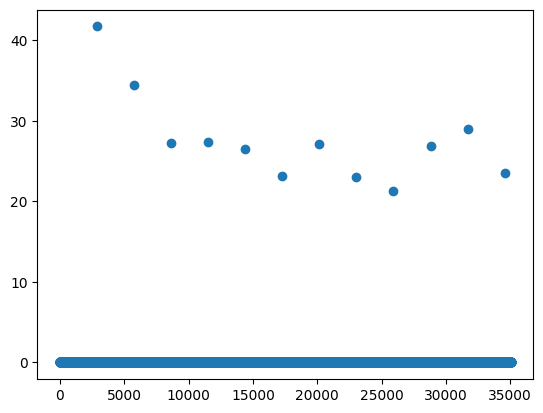

In [55]:
x = []
for i in range(35040):
    x.append(i)

plt.scatter(x, df['monthly_average'])

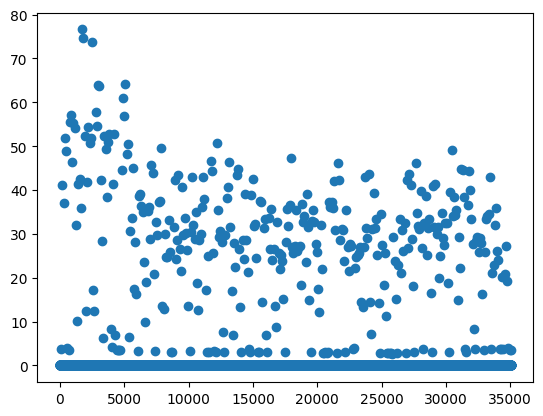

In [56]:
x = []
for i in range(35040):
    x.append(i)

plt.scatter(x, df['daily_average'])

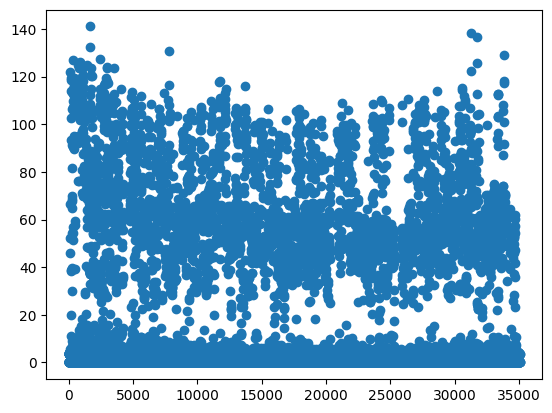

In [57]:
x = []
for i in range(35040):
    x.append(i)

plt.scatter(x, df['hourly_average'])